In [1]:
#Importing required Packages

import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
os.chdir('C:\\Analytics\\Projects\\Forecasting')

#Read the input file
df = pd.read_csv('agg_month.csv')
print(df.head())
print(df.tail())

      DATE  TotalNoRec  AVGNoRec
0  5/13/18    38199380   5457054
1  5/14/18    11781455   1683065
2  5/15/18    27254296   3893470
3  5/16/18    29797497   4256785
4  5/17/18    29782030   4254575
       DATE  TotalNoRec  AVGNoRec
42  6/24/18    50362924   7194703
43  6/25/18    16486297   2355185
44  6/26/18    54500732   7785818
45  6/27/18    29810088   4258584
46  6/28/18    29798717   4256959


As we are given 2 months data at daily level with the total number of orders and need to predict number of orders in future

In [16]:
#Subsetting the dataset
#Creating train and test files for modeling, first 40 days for training and last 6 days for testing

train=df.iloc[0:40,[0,1]] 
test=df.iloc[41:,[0,1]]

print(test)

       DATE  TotalNoRec
41  6/23/18    50355194
42  6/24/18    50362924
43  6/25/18    16486297
44  6/26/18    54500732
45  6/27/18    29810088
46  6/28/18    29798717


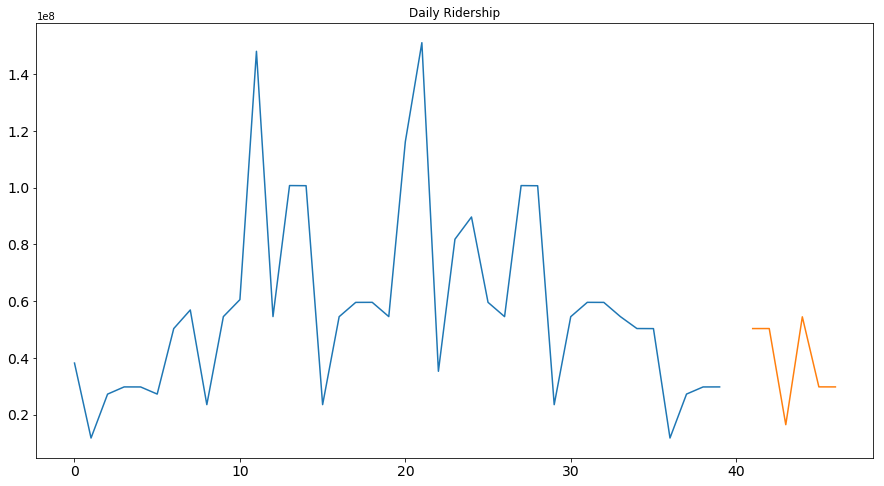

In [18]:
#Let’s visualize the data (train and test together) to know how it varies over a time period.

#Plotting data
train.TotalNoRec.plot(figsize=(15,8), title= 'Daily Order', fontsize=14)
test.TotalNoRec.plot(figsize=(15,8), title= 'Daily Order', fontsize=14)
plt.show()

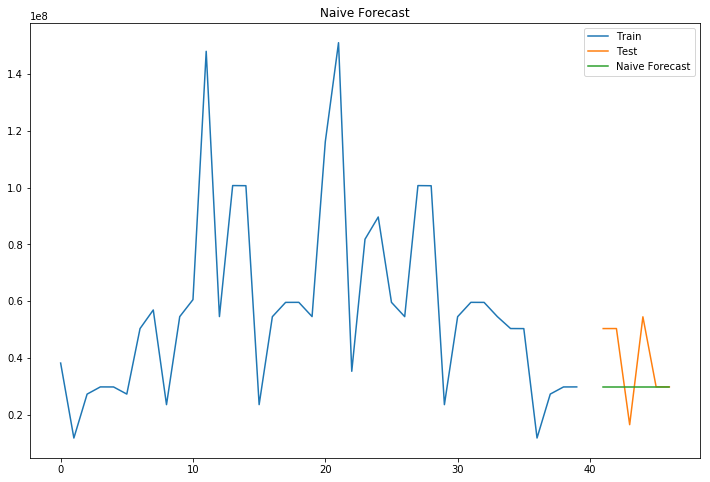

In [20]:
dd= np.asarray(train.TotalNoRec)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['TotalNoRec'], label='Train')
plt.plot(test.index,test['TotalNoRec'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.TotalNoRec, y_hat.naive))
print(rms)

16498486.752555814


Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

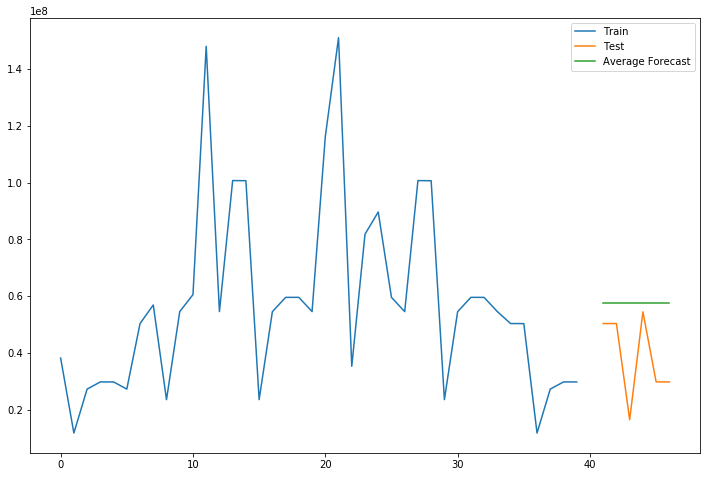

In [23]:
#Try Simple Average

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['TotalNoRec'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['TotalNoRec'], label='Train')
plt.plot(test['TotalNoRec'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(test.TotalNoRec, y_hat_avg.avg_forecast))
print(rms)

23687103.20669206


we can infer from the score that this method works best when the average at each time period remains constant.

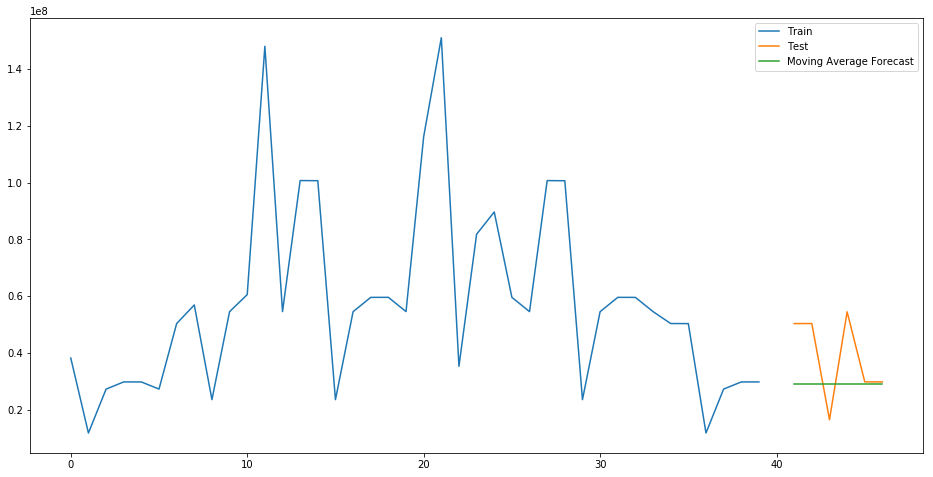

In [31]:
#Try Moving Average

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['TotalNoRec'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['TotalNoRec'], label='Train')
plt.plot(test['TotalNoRec'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(test.TotalNoRec, y_hat_avg.moving_avg_forecast))
print(rms)

16961943.794430528


Naive method outperforms both Average method and Moving Average method for this dataset. Now we will look at Simple Exponential Smoothing 

In [39]:
#Try  Simple Exponential Smoothing

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['TotalNoRec'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['TotalNoRec'], label='Train')
plt.plot(test['TotalNoRec'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

ImportError: cannot import name 'ExponentialSmoothing'

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing

ImportError: cannot import name 'ExponentialSmoothing'